<a href="https://colab.research.google.com/github/zkhodzhaev/skyrmion/blob/main/circle_object_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Let's define libraries first:**

In [ ]:
import ubermag
import discretisedfield as df
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import scipy.stats as stat
import seaborn as sb
import pandas as pd
import IPython.display as dis

**<p style="color:red;">In this analysis we will count the number skyrmions (aka circular shapes) entered/ exited the geometry. Also, we will count number of Skyrmions on the frame.</p>**

Visualization best showcases the underlying problem that we will solve in this script,so this is the problem:

In [2]:
%%HTML
<video width="860" height="220" controls>
  <source src="video.mp4" type="video/mp4">
</video>

**The files we have comes with .ovf extention. To get these files from the directory:**

In [ ]:
files=glob.glob("m00*.ovf")

In [ ]:
len(files)

681

In [ ]:
files[0:3]

['m000000.ovf', 'm000001.ovf', 'm000002.ovf']

**Sometimes, the directory may not be sorted based on the name. Since we need tehm to be in exact order, I found a way that sorts files by name (not perfect but works, feel free to include your suggestions):**

In [ ]:
files1=files.sort()
files1=files
files1[0:10]

['m000000.ovf',
 'm000001.ovf',
 'm000002.ovf',
 'm000003.ovf',
 'm000004.ovf',
 'm000005.ovf',
 'm000006.ovf',
 'm000007.ovf',
 'm000008.ovf',
 'm000009.ovf']

**Let's read and find out the type of the file and how to read it:**

In [ ]:
df.Field.fromfile(files1[1])

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(4.096e-06, 2.048e-06, 1e-09)), n=(1024, 512, 1), bc='', subregions={}), dim=3)

In [ ]:
d=df.Field.fromfile(files1[14])
type(d)

discretisedfield.field.Field

In [ ]:
d1=d.array #this converts it to a numpy array

In [ ]:
type(d1)

numpy.ndarray

In [ ]:
d1.shape

(1024, 512, 1, 3)

**Let's visualize and see what array visualizes. We have [x,y,1,3] 3 data= mx, my, mz. Let's decide what to take**

Text(0.5, 1.0, '$m_z$')

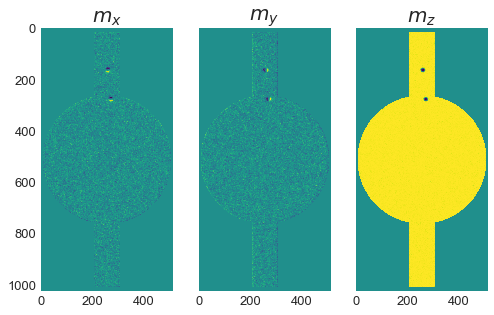

In [ ]:
fig, (ax, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True)

ax.imshow(d1[0:1024,0:512,0,0], interpolation="nearest", origin="upper")
ax.set_title("$m_x$")

ax2.imshow(d1[0:1024,0:512,0,1], interpolation="nearest", origin="upper")
ax2.set_title("$m_y$")

ax3.imshow(d1[0:1024,0:512,0,2], interpolation="nearest", origin="upper")
ax3.set_title("$m_z$")

**Mz seems a plausable. Now, let's define boundary where will consider the Skyrmion inside or outside of the Geometry. I will define 2 lines for boundaries:**

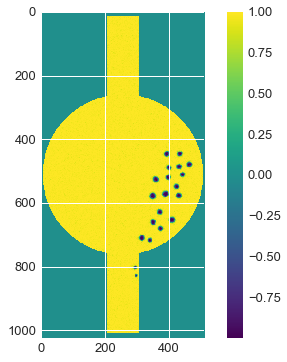

In [ ]:
file1 = files[355]

d = df.Field.fromfile(file1)
d1=d.array
d2=d1[0:1024,0:512,0,2]

plt.imshow(d2, interpolation="nearest", origin="upper")
plt.xticks()
plt.colorbar()
plt.grid()
plt.show()

**Let's see what are those dots aka Skyrmions from an array perspective. Let's choose x=800 to see those circles:**

In [ ]:
d2[690:730,320]

array([ 0.9869557 ,  0.97758216,  0.99815547,  0.99256974,  0.99985993,
        0.96943945,  0.98847073,  0.99137193,  0.98803556,  0.91260689,
        0.91952598,  0.72871339,  0.51960474,  0.31668904, -0.09809638,
       -0.48479438, -0.39656055, -0.41262504, -0.49057078, -0.61136812,
       -0.82180679, -0.79962939, -0.6212768 , -0.45494664, -0.1197134 ,
        0.00258524,  0.25866401,  0.68475598,  0.85244745,  0.87897223,
        0.88008142,  0.96912307,  0.97919273,  0.98704439,  0.99007869,
        0.99973929,  0.99949759,  0.99065757,  0.9986223 ,  0.97034216])

**It seems, the values are >0.9 and <0.0, the Skyrmion's center Mz values are <0.0. Let's clean and view it better:**

In [ ]:
#cleaning the data, getting only locations of the skyrmion

d22=np.zeros((1024,512)) #defining an empty array to save cleaned array

for i in range(0, 1024):
    for j in range(0,512):
        
        if ((d2[i,j])<-0.2):
            
            d22[i,j]=d2[i,j]

**To check, to see if we did clean:**

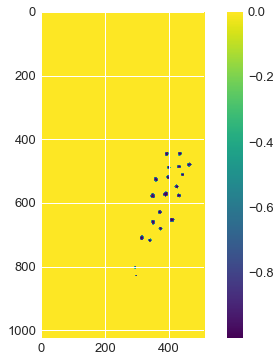

In [ ]:
plt.imshow(d22, interpolation="nearest", origin="upper")
plt.xticks()
plt.colorbar()
plt.grid()
plt.show()

*Let's see what we have here:*

In [ ]:
d22[690:730,320] ##this is a Skyrmion

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.48479438, -0.39656055, -0.41262504, -0.49057078, -0.61136812,
       -0.82180679, -0.79962939, -0.6212768 , -0.45494664,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

**It seems, the transition to Skyrmion happens from one of the edges. Since the object moves from 0 nm to 1000 nm, it will be better to see the transition from x-axis:**  

In [ ]:
[np.mean(d22[798,0:]),np.mean(d22[799,0:])] 

[0.0, 0.0]

**And if we look at the transition between frames (files) aka velocity:**

Text(0.5, 1.0, 'next frame')

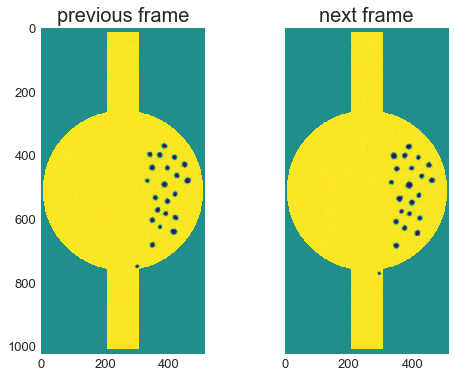

In [ ]:
file1 = files[294]
file2 = files[296]

d = df.Field.fromfile(file1)
d1=d.array
d = df.Field.fromfile(file2)
d2=d.array

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.imshow(d1[0:1024,0:512,0,2], interpolation="nearest", origin="upper")
ax.set_title("previous frame")

ax2.imshow(d2[0:1024,0:512,0,2], interpolation="nearest", origin="upper")
ax2.set_title("next frame")

**The movement can be fast, so to compensate, we will take into account 3 pixels for 800 mark, ans 1 pixel for 200 is sufficient due to it's size in the begining and end.**

**<p style="color:red;">Counting the number of Skyrmions on the frame.</p>**

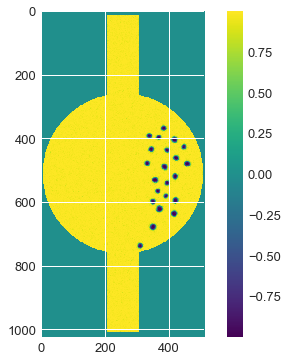

In [ ]:
d = df.Field.fromfile(files[292])

d1=d.array
d2=d1[0:1024,0:512,0,2]

plt.imshow(d2, interpolation="nearest", origin="upper")
plt.xticks()
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
count=0

d = df.Field.fromfile(files[292])

d1=d.array
d2=d1[0:1024,0:512,0,2]

for j in range(0, 510):
    for i in range(0,1022):
        
        if ((d2[i,j]) < -0.999):
            count=count+1
            
print("Number of Skyrmions on the frame:",count) 

Number of Skyrmions on the frame: 22


**I can utilize this to count the Skyrmions. So, this is the final script:**

Number of Skyrmion entered:  1
which file number (200 mark):  m000001.ovf


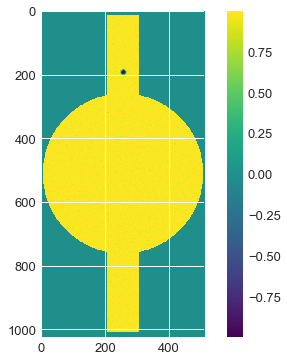

Number of Skyrmion entered:  2
which file number (200 mark):  m000019.ovf


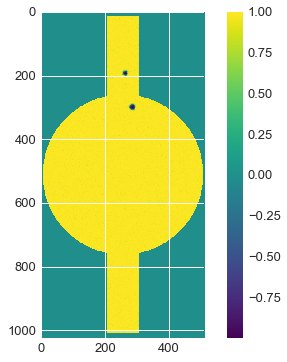

Number of Skyrmion entered:  3
which file number (200 mark):  m000030.ovf


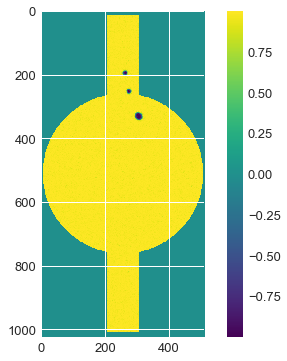

Number of Skyrmion entered:  4
which file number (200 mark):  m000042.ovf


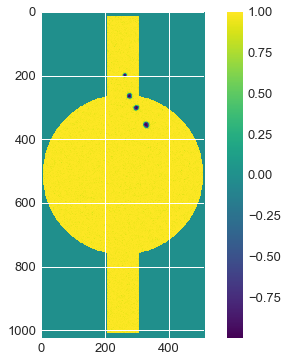

Number of Skyrmion entered:  5
which file number (200 mark):  m000052.ovf


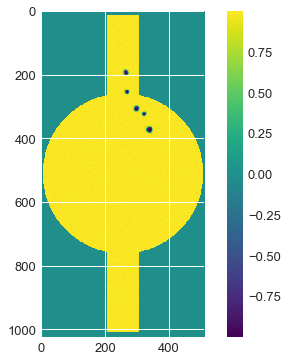

Number of Skyrmion entered:  6
which file number (200 mark):  m000063.ovf


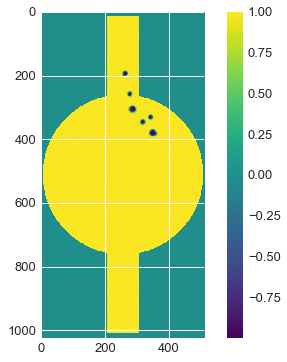

Number of Skyrmion entered:  7
which file number (200 mark):  m000074.ovf


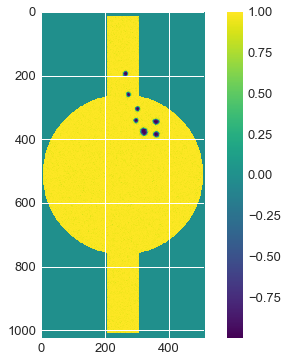

Number of Skyrmion entered:  8
which file number (200 mark):  m000085.ovf


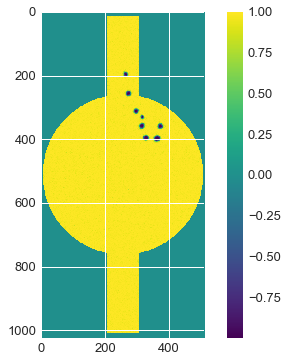

Number of Skyrmion entered:  9
which file number (200 mark):  m000096.ovf


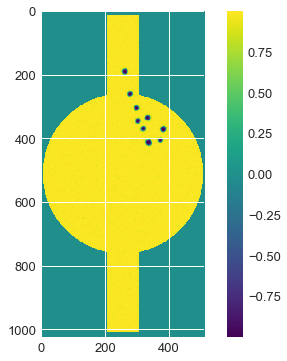

Number of Skyrmion entered:  10
which file number (200 mark):  m000107.ovf


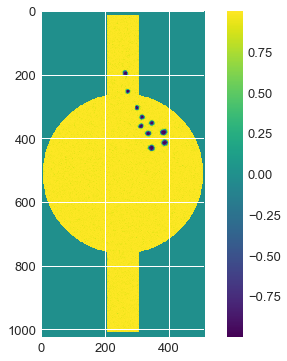

Number of Skyrmion entered:  11
which file number (200 mark):  m000118.ovf


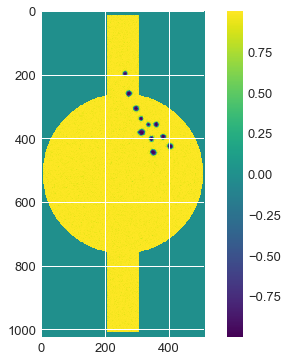

Number of Skyrmion entered:  12
which file number (200 mark):  m000129.ovf


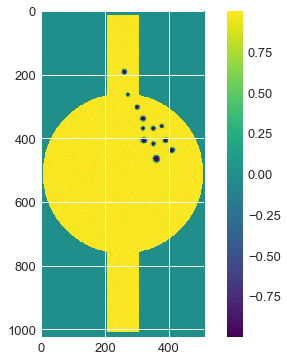

Number of Skyrmion entered:  13
which file number (200 mark):  m000140.ovf


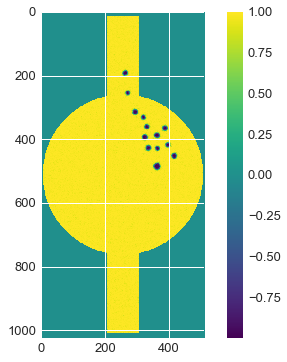

Number of Skyrmion entered:  14
which file number (200 mark):  m000151.ovf


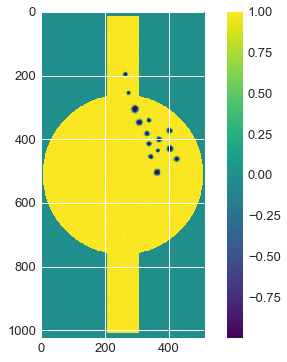

Number of Skyrmion entered:  15
which file number (200 mark):  m000162.ovf


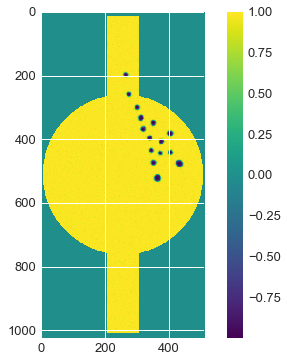

Number of Skyrmion entered:  16
which file number (200 mark):  m000173.ovf


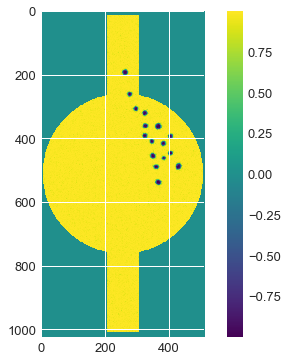

Number of Skyrmion entered:  17
which file number (200 mark):  m000184.ovf


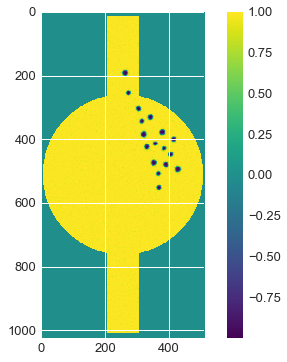

Number of Skyrmion entered:  18
which file number (200 mark):  m000195.ovf


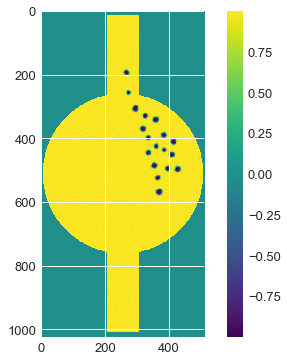

Number of Skyrmion entered:  19
which file number (200 mark):  m000206.ovf


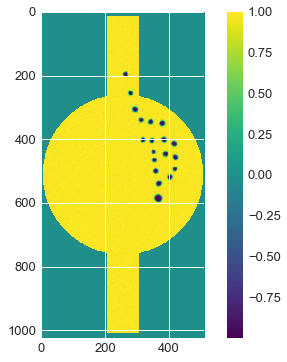

Number of Skyrmion entered:  20
which file number (200 mark):  m000218.ovf


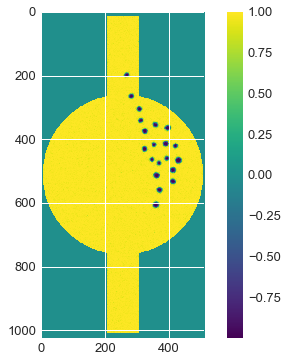

Number of Skyrmion entered:  21
which file number (200 mark):  m000228.ovf


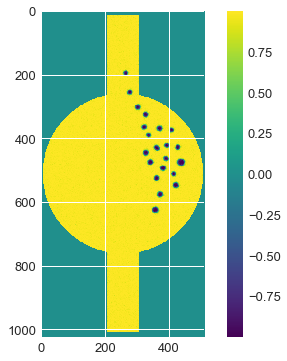

Number of Skyrmion entered:  22
which file number (200 mark):  m000239.ovf


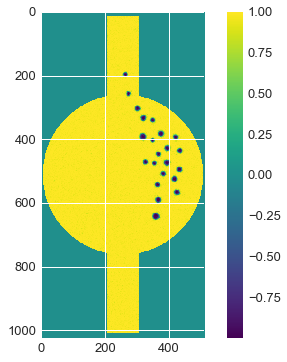

Number of Skyrmion left the geometry:  1
which file number (801 mark):  m000299.ovf


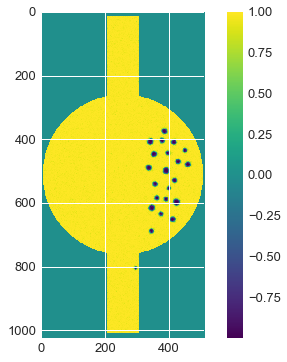

Number of Skyrmion left the geometry:  2
which file number (800 mark):  m000330.ovf


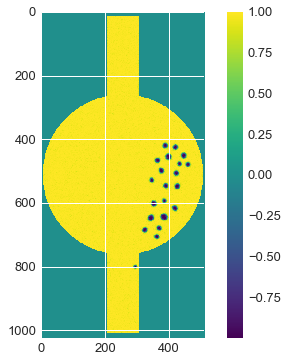

Number of Skyrmion left the geometry:  3
which file number (801 mark):  m000353.ovf


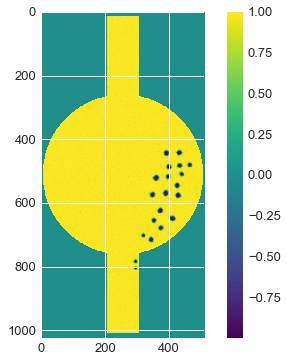

Number of Skyrmion left the geometry:  4
which file number (800 mark):  m000355.ovf


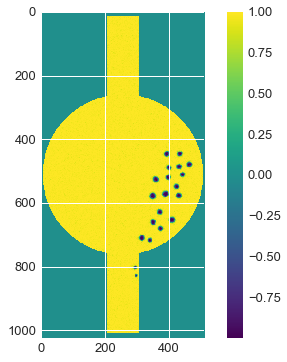

Number of Skyrmion left the geometry:  5
which file number (800 mark):  m000368.ovf


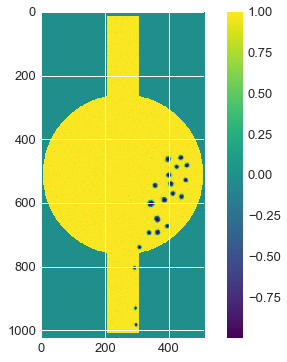

Number of Skyrmion left the geometry:  6
which file number (800 mark):  m000374.ovf


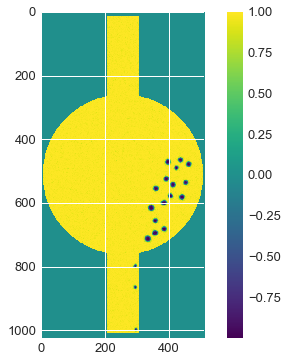

Number of Skyrmion left the geometry:  7
which file number (800 mark):  m000390.ovf


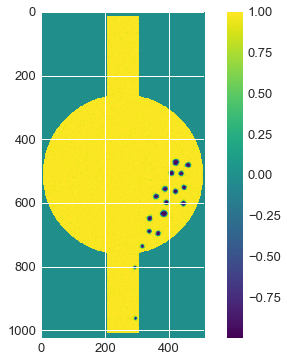

Number of Skyrmion left the geometry:  8
which file number (800 mark):  m000398.ovf


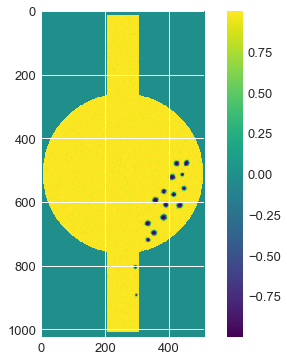

Number of Skyrmion left the geometry:  9
which file number (800 mark):  m000428.ovf


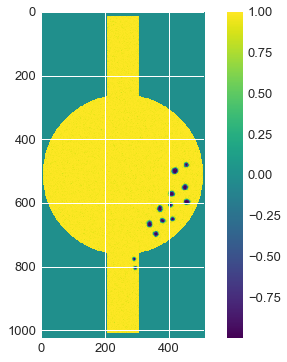

Number of Skyrmion left the geometry:  10
which file number (800 mark):  m000431.ovf


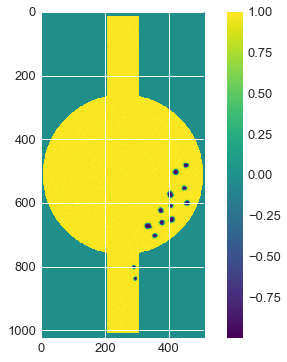

Number of Skyrmion left the geometry:  11
which file number (800 mark):  m000457.ovf


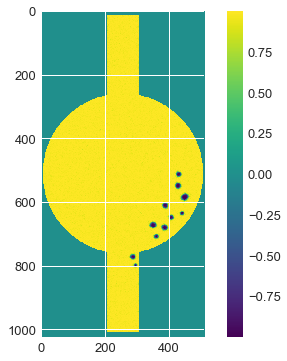

Number of Skyrmion left the geometry:  12
which file number (800 mark):  m000460.ovf


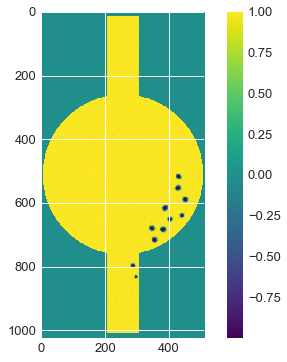

Number of Skyrmion left the geometry:  13
which file number (800 mark):  m000477.ovf


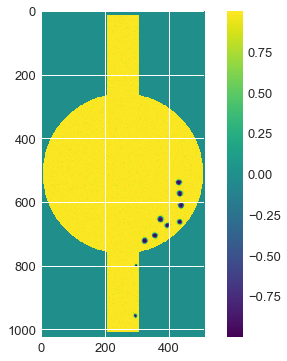

Number of Skyrmion left the geometry:  14
which file number (800 mark):  m000489.ovf


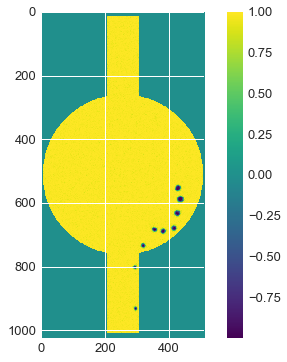

Number of Skyrmion left the geometry:  15
which file number (800 mark):  m000497.ovf


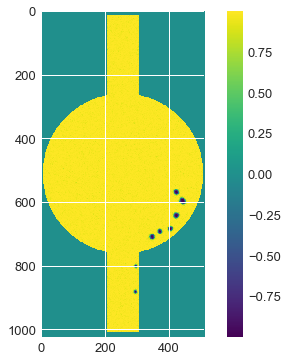

Number of Skyrmion left the geometry:  16
which file number (800 mark):  m000514.ovf


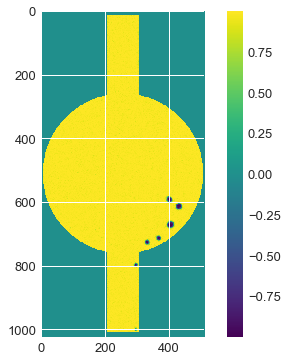

Number of Skyrmion left the geometry:  17
which file number (800 mark):  m000525.ovf


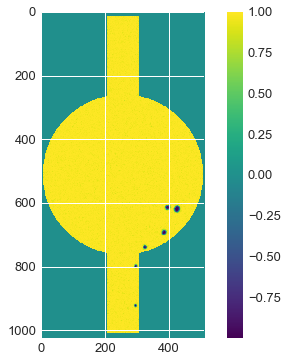

Number of Skyrmion left the geometry:  18
which file number (800 mark):  m000532.ovf


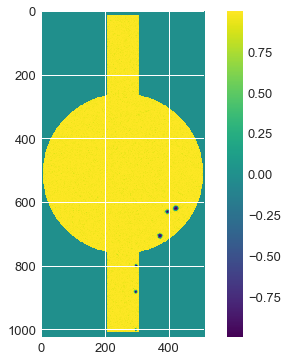

Number of Skyrmion left the geometry:  19
which file number (800 mark):  m000554.ovf


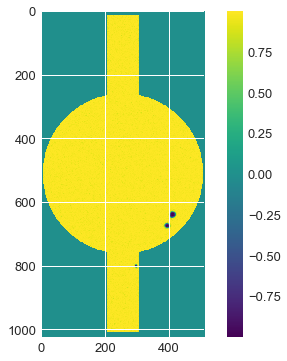

Number of Skyrmion left the geometry:  20
which file number (800 mark):  m000591.ovf


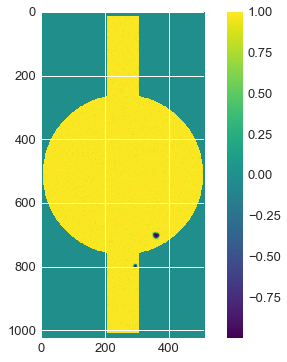

Number of Skyrmion left the geometry:  21
which file number (800 mark):  m000611.ovf


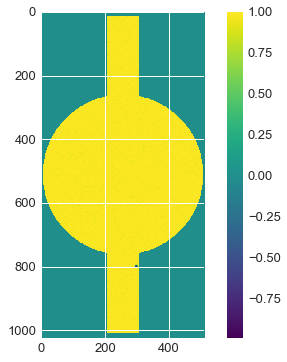

In [ ]:
files=glob.glob("m00*.ovf")

files1=files.sort()
files1=files #sorting in 0, 1, 2, 3, names
files2=files1 #additional copy for for loop 
files1=files1+[files1[len(files2)-2]] ##+1 element for k+1 (don't use this for For loop)

graph200xx=np.zeros(len(files2)) #gather data to plot the init and final speed relation. empty array to fill later
graph800xx=np.zeros(len(files2)) #gather data to plot the init and final speed relation

init=0
final=0
count200=0
count800=0

for k in range(0,len(files2)):

    d = df.Field.fromfile(files1[k]) #main array
    f = df.Field.fromfile(files1[k-1]) #previous array. 
    #-+1 are used in case, d is not able to detect the edge due to resolution of the simulation.

    d1=d.array #converting field array format into a numpy array, for future processing
    d2=d1[0:1024,0:512,0,2] #extracting the mz component of the magnetization

    f1=f.array
    f2=f1[0:1024,0:512,0,2]

    ############################################   

    #cleaning the data, getting only locations of the skyrmion:
    d22=np.zeros((1024,512))

    for i in range(0, 1024):
        for j in range(0,512):

            if ((d2[i,j])<-0.2):

                d22[i,j]=1.0 
    #we will assign 1.0, we can keep original values too

    e22=np.zeros((1024,512))

    for i in range(0, 1024):
        for j in range(0,512):

            if ((e2[i,j])<-0.2):

                e22[i,j]=1.0

    f22=np.zeros((1024,512))

    for i in range(0, 1024):
        for j in range(0,512):

            if ((f2[i,j])<-0.2):

                f22[i,j]=1.0

    ############################################ 
    #counting for 200 mark, it's size is bigger, in the beginning, so 1 loop is enough  

    if ((np.mean(d22[200,:])) != 0.0):
        if ((np.mean(f22[200,:])) == 0.0): 
    #to not get into trap of repitition, we will compare it to previous frame

            count200=count200+1
            
            print("Number of Skyrmion entered: ",count200)
            print("which file number (200 mark): ", files1[k])
            
            graph200xx[k]=1.0

            plt.imshow(d2, interpolation="nearest", origin="upper")
            plt.xticks()
            plt.colorbar()
            plt.grid()
            plt.savefig("fileNo"+str(k)+".png", dpi=300)
            plt.show()


    ############################################ 
    #and now for 800 point
    #the circular shape gets small, so here we might need to add additional loops
    #of course depends on the autosave of these files

    if ((np.mean(d22[800,:])) != 0.0):
        if ((np.mean(f22[800,:])) == 0.0):

            count800=count800+1
            
            print("Number of Skyrmion left the geometry: ",count800)
            print("which file number (800 mark): ", files1[k])
            
            graph800xx[k]=1.0

            plt.imshow(d2, interpolation="nearest", origin="upper")
            plt.xticks()
            plt.colorbar()
            plt.grid()
            plt.savefig("fileNo"+str(k)+".png", dpi=300)
            plt.show()
            
    elif ((np.mean(d22[801,:])) != 0.0):
        if ((np.mean(f22[801,:])) == 0.0): 

            count800=count800+1
            
            print("Number of Skyrmion left the geometry: ",count800)
            print("which file number (801 mark): ", files1[k])
            
            graph800xx[k]=1.0

            plt.imshow(d2, interpolation="nearest", origin="upper")
            plt.xticks()
            plt.colorbar()
            plt.grid()
            plt.savefig("fileNo"+str(k)+".png", dpi=300)
            plt.show()
            


In [ ]:
print("Number of Skyrmion entered: ",count200)
print("Number of Skyrmion left: ",count800)

Number of Skyrmion entered:  22
Number of Skyrmion left:  21


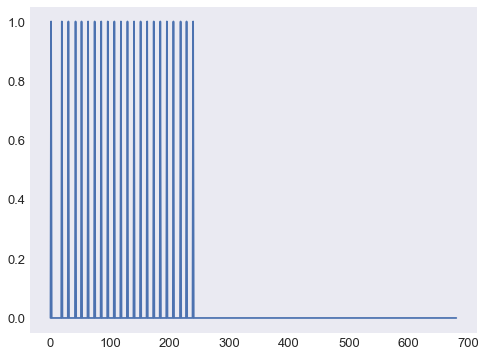

In [ ]:
plt.plot(graph200xx)

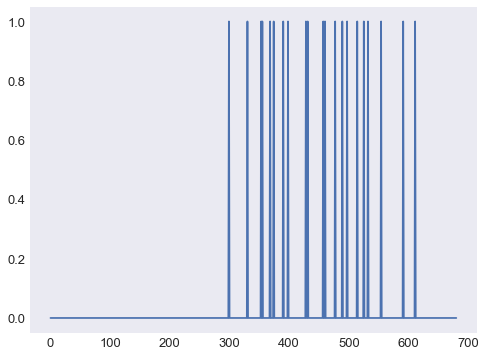

In [ ]:
plt.plot(graph800xx)

In [ ]:
# pd.DataFrame(graph200xx).to_csv("T20K200.csv", header=None, index=None)
# pd.DataFrame(graph800xx).to_csv("T20K800.csv", header=None, index=None)

# we can save the data for further processing 